In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('Solarize_Light2')
%matplotlib notebook
from scipy.optimize import curve_fit
import ugradio

['seaborn-muted', '_classic_test', 'seaborn-poster', 'seaborn-notebook', 'seaborn-colorblind', 'ggplot', 'seaborn-bright', 'seaborn-dark', 'fivethirtyeight', 'dark_background', 'classic', 'grayscale', 'seaborn-talk', 'seaborn-paper', 'seaborn-white', 'seaborn-whitegrid', 'seaborn-deep', 'seaborn', 'Solarize_Light2', 'seaborn-pastel', 'bmh', 'seaborn-dark-palette', 'seaborn-ticks', 'fast', 'tableau-colorblind10', 'seaborn-darkgrid']
No module named 'rtlsdr'


# 7: Plotting Test Data & Real Data

## Test Data

In [2]:
test_df = pd.read_csv('bighorn_test_data')
test_f = test_df['Frequency']
test_s = test_df['Sample']



FileNotFoundError: [Errno 2] No such file or directory: 'bighorn_test_data'

<IPython.core.display.Javascript object>


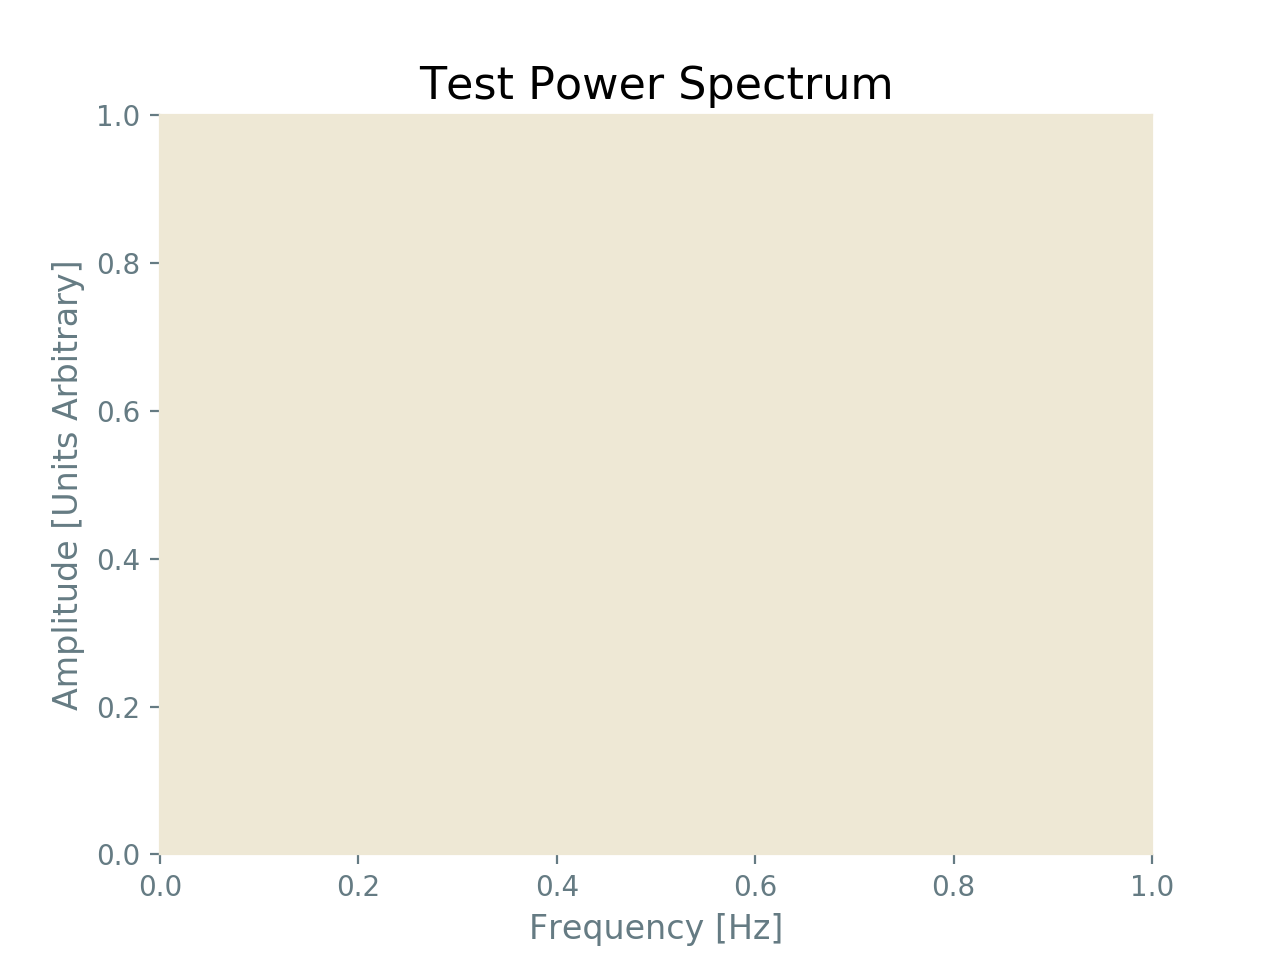

NameError: name 'test_f' is not defined

In [3]:
%matplotlib notebook

plt.figure()
plt.grid()
plt.title('Test Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(test_f, test_s)
plt.show()


In [4]:
real_df = pd.read_csv('bighorn_real_data')
real_f = real_df['Frequency']
real_s = real_df['Sample']

<IPython.core.display.Javascript object>


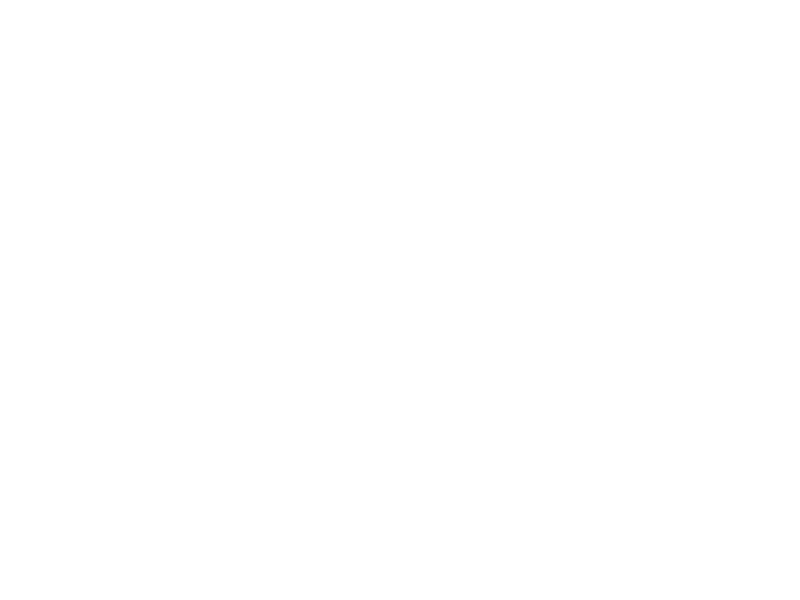

In [5]:

plt.figure()
plt.grid()
plt.title('Real Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(real_f, real_s)
plt.show()

## Real Good Data

In [6]:
rgd = pd.read_csv('real_good_data')
rgf = rgd['f']
rga = rgd['a']

In [7]:
cd = pd.read_csv('cole_data')
cf = cd['f']
ca = cd['a']

In [8]:
new_data = ca - rga

<IPython.core.display.Javascript object>


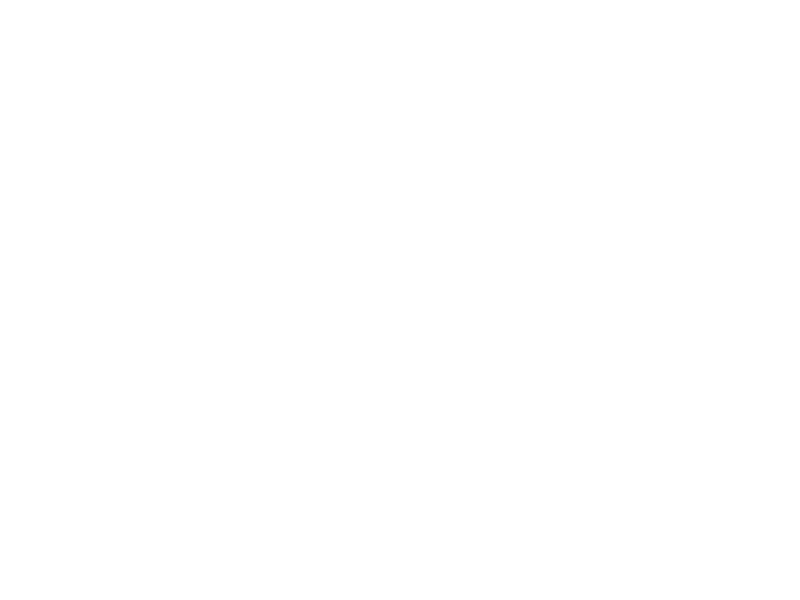

In [9]:
plt.figure()
plt.grid()
plt.title('Real Good Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf, new_data, label='diff')
plt.semilogy(rgf, rga, label='cold')
plt.semilogy(cf, ca, label='bb')
plt.legend()
plt.show()
plt.savefig('RealGood.png') 

<IPython.core.display.Javascript object>


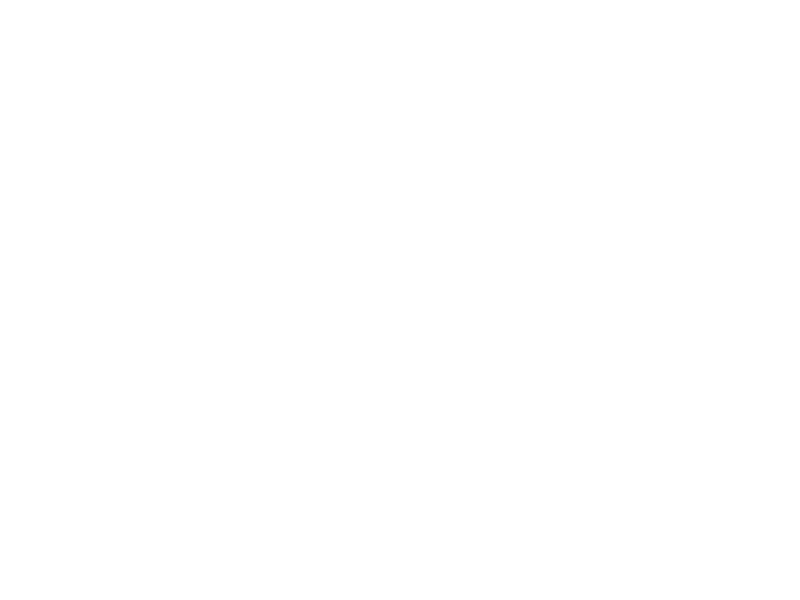

In [10]:
shape = rga/ca

plt.figure()
plt.grid()
plt.title('Line Shape Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf, shape)
plt.show()

In [11]:
sum_rga = sum(rga)
G = 300/np.sum(new_data)*np.sum(rga)
G

147.56669625240806

<IPython.core.display.Javascript object>


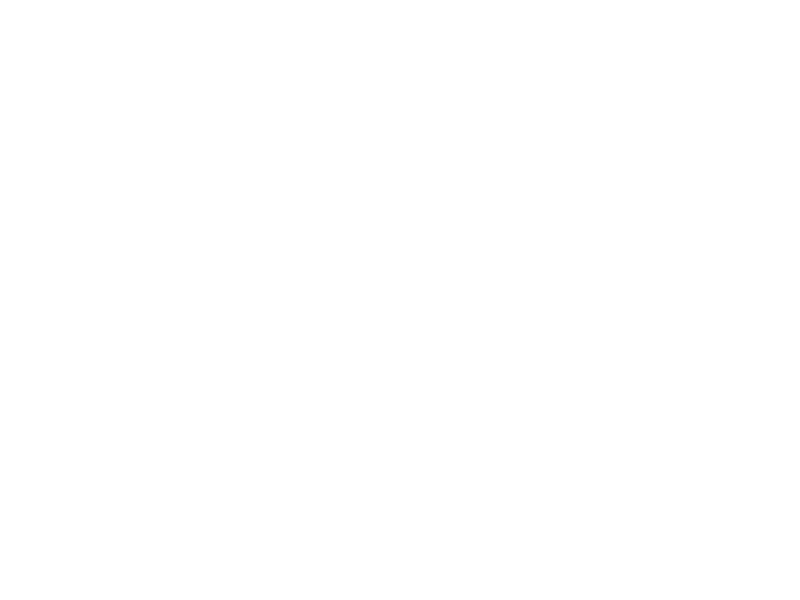

In [12]:
t_line = G*shape

plt.figure()
plt.grid()
plt.title('T_line Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf, t_line)

plt.show()

In [13]:
np.where(t_line==np.max(t_line))

(array([1265]),)

<IPython.core.display.Javascript object>


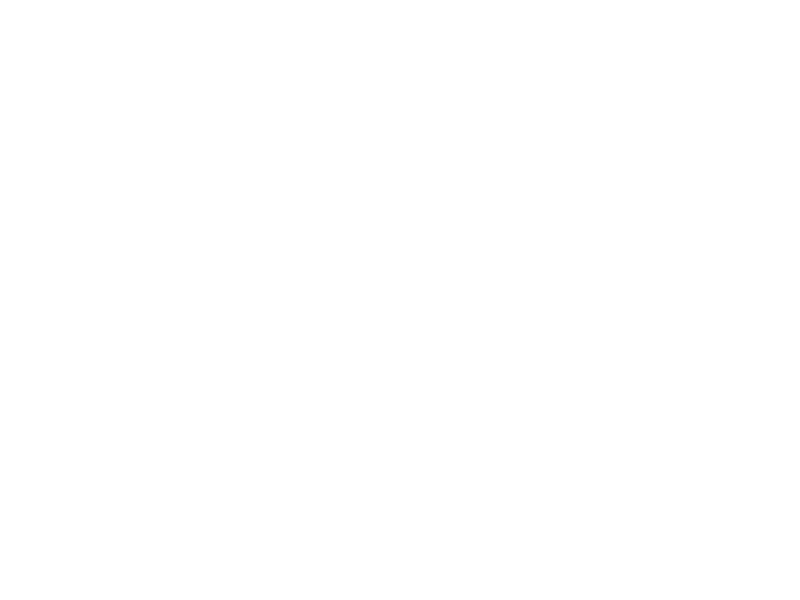

In [14]:
nu_0 = 1420e6
delta_nu = rgf - nu_0
v = -delta_nu/nu_0*(3e5)

plt.figure()
plt.grid()
plt.title('T_line Power Spectrum')
plt.xlabel('Velocity [km/s]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.plot(v, t_line)
plt.show()

4th measurement - pointed at the city - exhibits possible signs of transmitters illegally(!!) operating within the RF band (tallest band)

In [15]:
import time

In [16]:
ugradio.doppler.get_projected_velocity(151,37.87,22053)

<Quantity -12617.96541144 m / s>

In [17]:
cal1_df = pd.read_csv('cal_data.csv')
cal2_df = pd.read_csv('cal_test_data.csv')
cal3_df = pd.read_csv('cal_test_data2.csv')
cal4_df = pd.read_csv('cal_test_data3.csv')
cal5_df = pd.read_csv('cal_test_data4.csv')
cal6_df = pd.read_csv('cal_test_data5.csv')
rgf_1 = cal1_df['f']
rgf_2 = cal2_df['f']
rgf_3 = cal3_df['f']
rgf_4 = cal4_df['f']
rgf_5 = cal5_df['f']
rgf_6 = cal6_df['f']
rga_1 = cal1_df['a']
rga_2 = cal2_df['a']
rga_3 = cal3_df['a']
rga_4 = cal4_df['a']
rga_5 = cal5_df['a']
rga_6 = cal6_df['a']

<IPython.core.display.Javascript object>


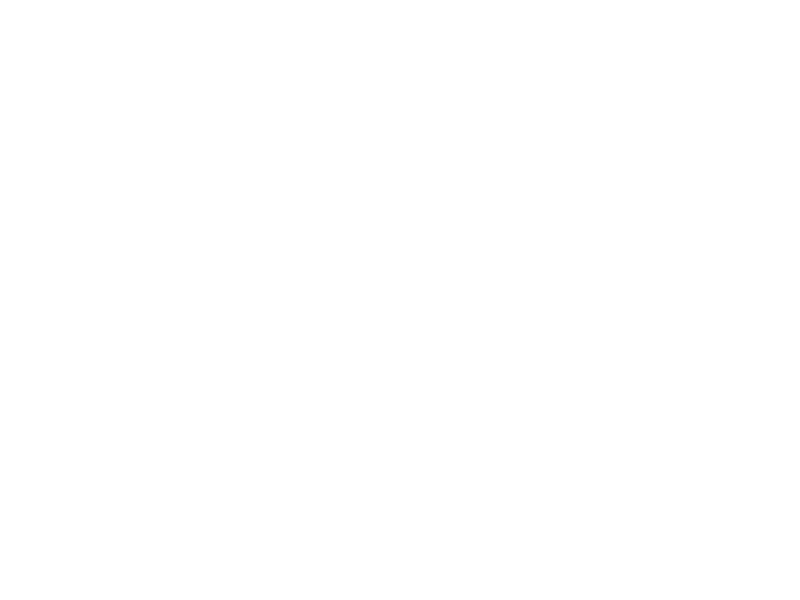

In [18]:
plt.figure()
plt.grid()
plt.title('Assortment of Power Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf_1*1e-6, rga_1, label = "approximate blackbody")
plt.semilogy(rgf_2*1e-6, rga_2, label = "at the wall")
#plt.semilogy(rgd_3*1e-6, rga_3)
#plt.semilogy(rgd_4*1e-6, rga_4)
#plt.semilogy(rgd_5*1e-6, rga_5)
plt.semilogy(rgf_6*1e-6, rga_6, label = "at the sky")

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


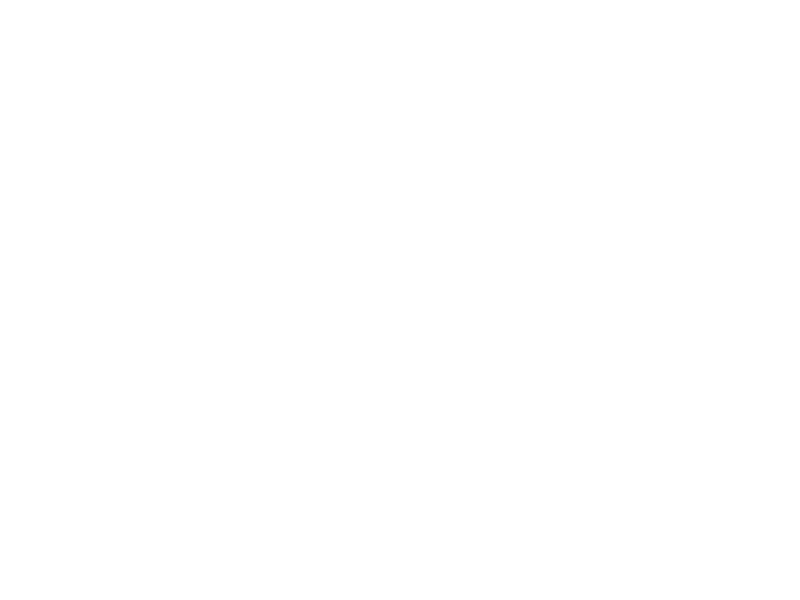

In [19]:
plt.figure()
plt.grid()
plt.title('Assortment of Power Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplitude [Units Arbitrary]')
#plt.plot(rgf_1*1e-6, rga_1, label = "approximate blackbody")
plt.plot(rgf_2*1e-6, rga_2, label = "at the wall")
#plt.semilogy(rgd_3*1e-6, rga_3)
#plt.semilogy(rgd_4*1e-6, rga_4)
#plt.semilogy(rgd_5*1e-6, rga_5)
plt.plot(rgf_6*1e-6, (rga_1-rga_2), label = "difference")
plt.xlim(-1,0.75)
plt.legend()
plt.show()

In [20]:
#renaming blackbody data and trimming away the illicit frequency hijacking the tail of our spectra
bb_f = cal1_df['f'][:1840]
bb_a = cal1_df['a'][:1840]
#renaming null (wall) data
null_f = cal2_df['f'][:1840]
null_a = cal2_df['a'][:1840]
#renaming sky data
sky_f = cal6_df['f'][:1840]
sky_a = cal6_df['a'][:1840]

<IPython.core.display.Javascript object>


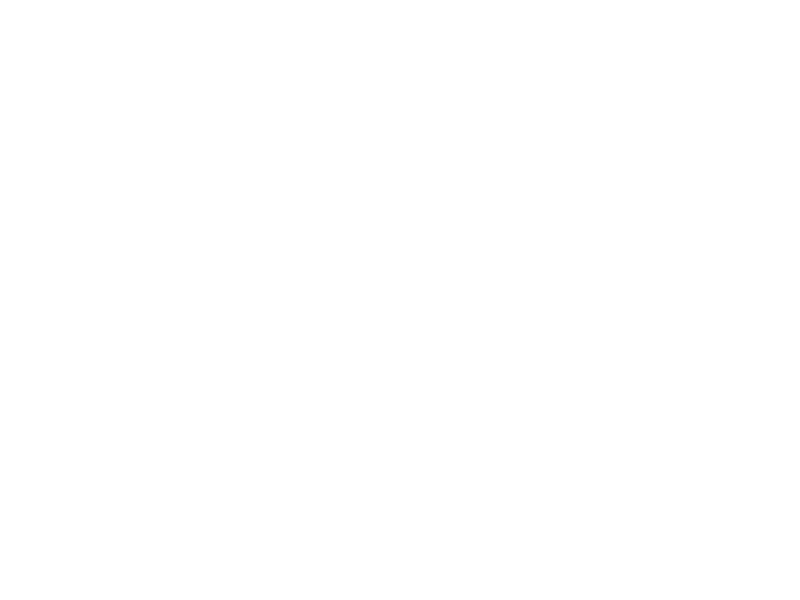

In [21]:
shape = bb_a - null_a
plt.figure()
plt.grid()
plt.title('Line Shape Power Spectrum')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.plot(null_f*1e-6, shape)
plt.show()

In [22]:
len(shape)

1840

In [23]:
calibrate = np.mean(shape)
calibrate

154.04530655327406

In [24]:
PtoT = 300/calibrate
PtoT

1.947479002849398

In [25]:
sum_rga = sum(null_a)
G = 300/np.sum(shape)*np.sum(null_a)
G

1859.5230549002617

<IPython.core.display.Javascript object>


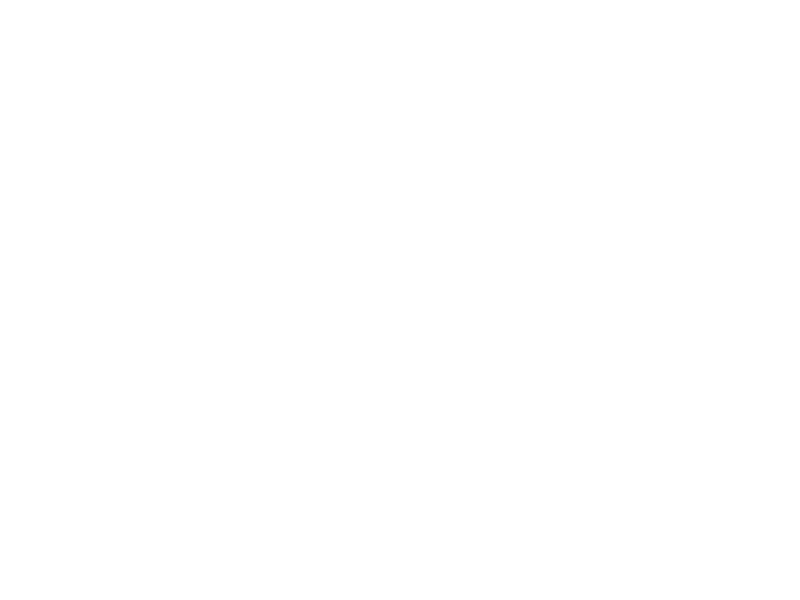

In [26]:
t_line = PtoT*shape

plt.figure()
plt.grid()
plt.title('T_line Power Spectrum')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.plot(null_f*1e-6, t_line)
plt.show()

In [27]:
sum_rga = sum(rga)
G = 300/np.sum(new_data)*np.sum(rga)
G

147.56669625240806

In [28]:
np.polyfit(null_f,t_line,7)


array([-1.85756265e-39, -1.68436799e-33,  2.04659132e-27,  1.79272001e-21,
       -4.84907148e-16, -5.84339849e-10,  9.31674827e-05,  3.70580119e+02])

In [29]:
x = null_f
fitted_t_line = (x**7)*-1.85756265e-39 + (x**6)*-1.68436799e-33 + (x**5)*2.04659132e-27 + (x**4)*1.79272001e-21 + (x**3)*-4.84907148e-16 + (x**2)*-5.84339849e-10 + (x)*9.31674827e-05 + 3.70580119e+02 


<IPython.core.display.Javascript object>


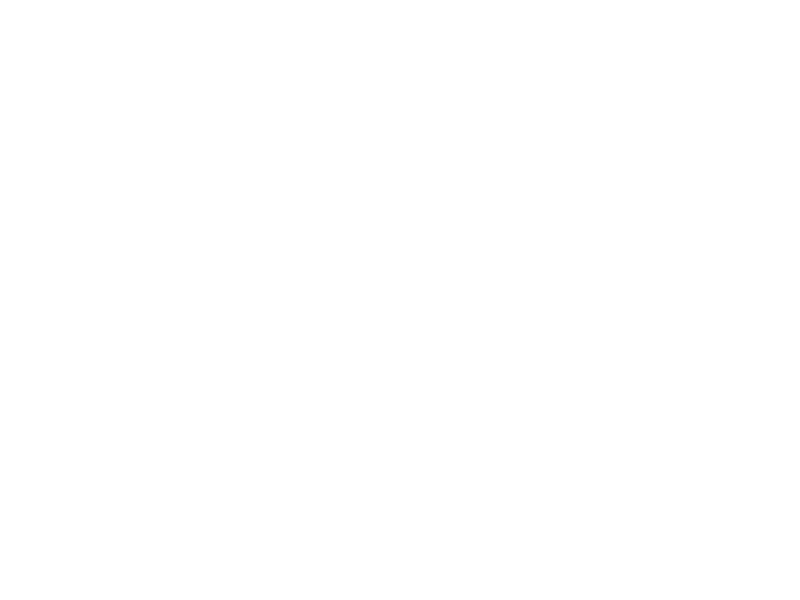

In [30]:
plt.figure()
plt.grid()
plt.title('T_line Power Spectrum')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K/P]')
plt.plot(null_f*1e-6, t_line, label='calibrated')
plt.plot(null_f*1e-6,fitted_t_line, label = 'fitted t line')
#plt.plot(null_f*1e-6, sky_a, label='sky')
plt.legend()
plt.show()

# this is how the gain varies with frequency - it's freq dependant 

In [31]:
offset = 10 - np.mean(t_line)*sky_a

In [32]:
offset

0       -69196.826091
1       -68035.391287
2       -68927.173662
3       -68278.393105
4       -69716.158359
            ...      
1835   -153632.367463
1836   -154546.660964
1837   -158232.695723
1838   -153146.760809
1839   -153474.003124
Name: a, Length: 1840, dtype: float64

<IPython.core.display.Javascript object>


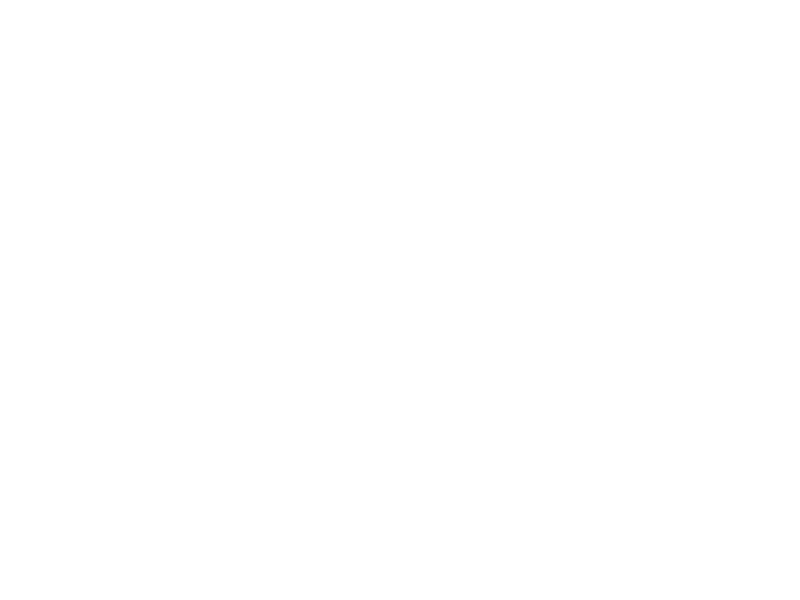

In [33]:
plt.figure()
plt.grid()
plt.title('T_line Temperature Spectrum')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.plot(null_f*1e-6, sky_a*fitted_t_line, label='calibrated')
plt.plot(null_f*1e-6, offset, label = '0 K')
plt.legend()
plt.show()

In [34]:
offset

0       -69196.826091
1       -68035.391287
2       -68927.173662
3       -68278.393105
4       -69716.158359
            ...      
1835   -153632.367463
1836   -154546.660964
1837   -158232.695723
1838   -153146.760809
1839   -153474.003124
Name: a, Length: 1840, dtype: float64

## Calibration

Equation:

$$T(P, \nu) = C(\nu)P(\nu) + D$$

Here:
T = temperature in K \\
P = power in arbitrary units \\
$\nu$ = frequency in Hz \\
C = conversion factor ("gain") in Kelvin/power \\
D = offset (system temp., due to amplifiers, electronics ...)

In [35]:
# step 1: find C

T_bb = 310  # K
T_cs = 10
P_bb = bb_a
P_cs = sky_a

# do bb minus cs: CS
C = (T_bb - T_cs) / (P_bb - P_cs)  # conversion factor

# we can fit a polynomial to C but let's do the avg for now (0th order polynomial). Should do higher order.
x = null_f
C = (x**2)*4.34002430e-13 + x*-8.63788801e-08 + 5.23798861e-01

#Cmean = np.mean(C)

# step 2: plug C into equation above, solve for D using either the BB or the CS

# CS:
D = T_cs - C * P_cs

# should we fit a polynomial to D? yes
D = (x**2)*-1.36558408e-11 + x*9.49413668e-06 + -4.02773920e+02
# step 3, last step: get T for our measurement of the H1 line

def power2temp(power):
    """
    Convert any power spectrum to temperature in K
    """
    return C * power + D

In [36]:
print(C)

0       1.143959
1       1.142841
2       1.141724
3       1.140608
4       1.139493
          ...   
1835    0.777943
1836    0.778663
1837    0.779384
1838    0.780106
1839    0.780829
Name: f, Length: 1840, dtype: float64


<IPython.core.display.Javascript object>


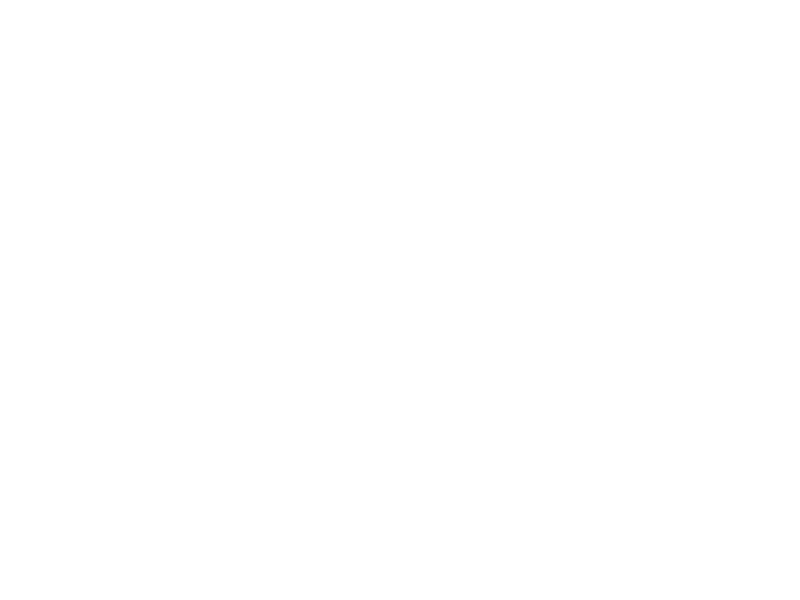

In [37]:
# cold sky is used for calibration - so we shoudln't expect to see bright hydrgen 


example = power2temp(sky_a)

plt.figure()
plt.plot(null_f*1e-6, example - np.mean(example))
plt.xlabel("Frequency [MHz]")
plt.ylabel("Temperature [K]")
plt.title("Calibration Temperature Line")
plt.grid()
plt.show()
plt.savefig("Temp.png")

In [38]:
np.polyfit(null_f, D, 2)

array([-1.36558408e-11,  9.49413668e-06, -4.02773920e+02])

In [39]:
import ugradio
import numpy as np
from astropy import units as u
from astropy import constants as c
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from scipy.optimize import curve_fit

In [40]:
bb_data = pd.read_csv('cal_data.csv')
bb_f = bb_data['f'][93:1840]*1e-6
bb_a = bb_data['a'][93:1840]

sky_data = pd.read_csv('sec8_data.csv')
sky_f = sky_data['f'][93:1840]*1e-6
sky_a = sky_data['a'][93:1840]

In [41]:
plt.figure()
plt.grid()
plt.title('Power Spectra for Galactic Coordinates l=180, b=0')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.plot(bb_f, bb_a, label = "Blackbody")
plt.plot(sky_f, sky_a, label = "Cold Sky")
plt.legend()
plt.show()
plt.savefig('PowerSpec.png')

<IPython.core.display.Javascript object>

In [42]:
s_shape = sky_a / bb_a - 0.565

plt.figure()
plt.grid()
plt.title('Power Spectrum Shape')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.plot(bb_f, s_shape, label = "Shape")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

In [43]:
diff = np.sum(bb_a - sky_a)
G = 300/diff * np.sum(sky_a)
t_line = G * s_shape

plt.figure()
plt.grid()
plt.title('Intensity Calibrated Spectrum')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.plot(bb_f, t_line, label = "T Line")
plt.legend()
plt.show()
plt.savefig('Intensity.png')

<IPython.core.display.Javascript object>

In [44]:
v = - bb_f/1420.4 * c.c.to(u.km/u.s)
dop_corr = ugradio.doppler.get_projected_velocity(151,37.87,22053).to(u.km/u.s)
v_corr = v+dop_corr
ugradio.doppler.get_projected_velocity??

In [45]:
fig, ax = plt.subplots()
plt.grid()
plt.title('Calibrated Temperature vs Doppler Velocity Spectrum')
plt.xlabel('Doppler Velocity [km/s]')
ax.invert_xaxis()
plt.ylabel('Temperature [K]')
plt.plot(v_corr, t_line)
plt.savefig("Velocity.png")

<IPython.core.display.Javascript object>

In [46]:
#truncate the data even more
bb_f = bb_f[890:1723]
bb_a = bb_a[890:1723]

sky_f = sky_f[890:1723]
sky_a = sky_a[890:1723]

In [47]:
s_shape = sky_a / bb_a - 0.558
diff = np.sum(bb_a - sky_a)
G = 300/diff * np.sum(sky_a)
t_line = G * s_shape

v = - bb_f/1420 * c.c.to(u.km/u.s)
dop_corr = ugradio.doppler.get_projected_velocity(151,37.87,22053).to(u.km/u.s)
v_corr = v + dop_corr

<IPython.core.display.Javascript object>


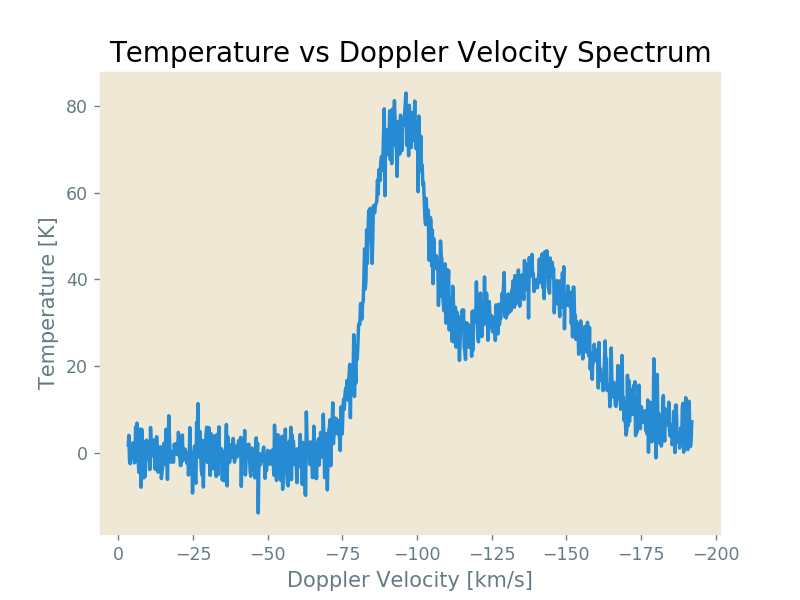

In [54]:
fig, ax = plt.subplots()
plt.grid()
plt.title('Temperature vs Doppler Velocity Spectrum')
plt.xlabel('Doppler Velocity [km/s]')
ax.invert_xaxis()
plt.ylabel('Temperature [K]')
plt.plot(v+dop_corr, t_line)
plt.show()

In [56]:
gaussian_fit, cov = ugradio.gauss.gaussfit(x = np.array((v+dop_corr)),
                                      y = np.array((t_line)), 
                                      amp = [70, 30], 
                                      avg = [-90, -140], 
                                      sig = [40, 60],
                                     return_cov=True)
gaussian_fit
ugradio.gauss.gaussfit??


In [58]:
gaussian_val = ugradio.gauss.gaussval(np.array(v+dop_corr), 
                                     gaussian_fit['amp'],
                                     gaussian_fit['avg'],
                                     gaussian_fit['sig'])

<IPython.core.display.Javascript object>


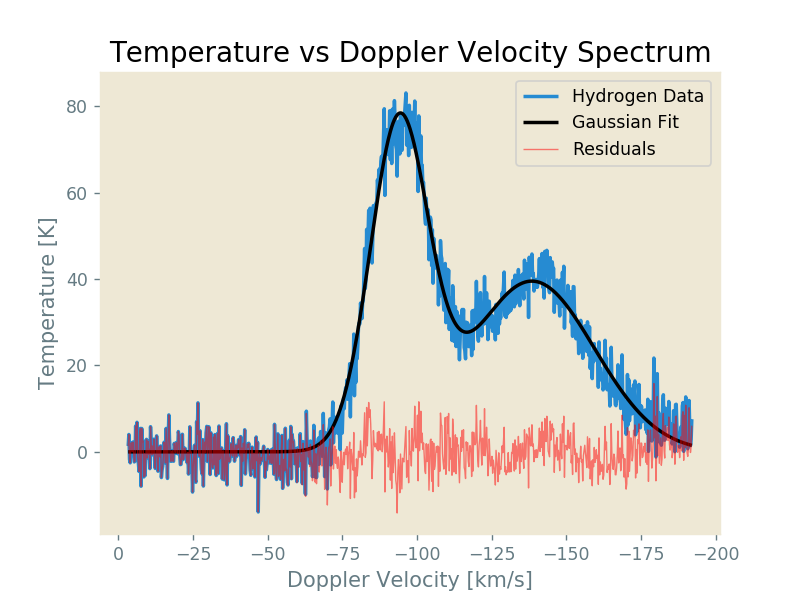

In [59]:
fig, ax = plt.subplots()
plt.grid()
plt.title('Temperature vs Doppler Velocity Spectrum')
plt.xlabel('Doppler Velocity [km/s]')
ax.invert_xaxis()
plt.ylabel('Temperature [K]')
plt.plot(v_corr, t_line, label='Hydrogen Data')
plt.plot(v_corr, gaussian_val, lw=2, color='black', label='Gaussian Fit')
plt.plot(v_corr, t_line - ugradio.gauss.gaussval(np.array(v_corr), **gaussian_fit), alpha=0.5, lw=0.8, color='red', label='Residuals')
plt.legend()
plt.savefig("Observation_Spect.png")

In [52]:
gaussian_val = ugradio.gauss.gaussval(np.array(chopped_sec8_f), amp = np.array([ 45.21939174, 103.52846147]),avg = np.array([0.39580223, 0.67168246]), sig = np.array([0.02592999, 0.09852791]))

NameError: name 'chopped_sec8_f' is not defined

In [60]:
def chisq(ys, mdl, sig):
    return np.sum(np.abs(ys-mdl)**2/sig**2)

def reduced_chisq(ys, mdl, sig):
    return np.sum(np.abs(ys-mdl)**2/sig**2) / (len(ys) - 6)

sigma_i = np.std(chopped_Hyd_Temp[-100:])
reduced_chisq(chopped_Hyd_Temp, gaussian_val, sigma_i)

NameError: name 'chopped_Hyd_Temp' is not defined